<a href="https://colab.research.google.com/github/JiHoonMin/deeplearning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


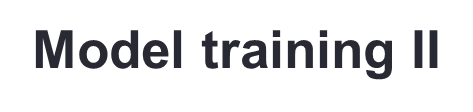

In [ ]:
import sklearn
import numpy as np
import numpy.random as rnd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from copy import deepcopy
from sklearn.model_selection import train_test_split


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def plot_generated_data(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.show()
    

def early_stopping(X_train, X_val):
    poly_scaler = Pipeline([
            ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
            ("std_scaler", StandardScaler())
        ])

    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled = poly_scaler.transform(X_val)
    
    return X_train_poly_scaled, X_val_poly_scaled

def plot_early_stopping():
    sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

    n_epochs = 500
    train_errors, val_errors = [], []
    for epoch in range(n_epochs):
        sgd_reg.fit(X_train_poly_scaled, y_train)
        y_train_predict = sgd_reg.predict(X_train_poly_scaled)
        y_val_predict = sgd_reg.predict(X_val_poly_scaled)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    plt.annotate('Best model',
                 xy=(best_epoch, best_val_rmse),
                 xytext=(best_epoch, best_val_rmse + 1),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=16,
                )

    best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

def plot_logistic(_new, y_proba):
    decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

    plt.figure(figsize=(8, 3))
    plt.plot(X[y==0], y[y==0], "bs")
    plt.plot(X[y==1], y[y==1], "g^")
    plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
    plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
    plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
    plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
    plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
    plt.xlabel("Petal width (cm)", fontsize=14)
    plt.ylabel("Probability", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([0, 3, -0.02, 1.02])
    plt.show()
    
def plot_softmax():
    x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]


    y_proba = softmax_reg.predict_proba(X_new)
    y_predict = softmax_reg.predict(X_new)

    zz1 = y_proba[:, 1].reshape(x0.shape)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([0, 7, 0, 3.5])
    plt.show()

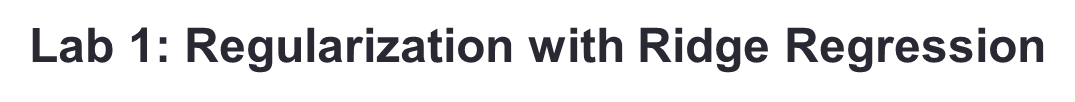

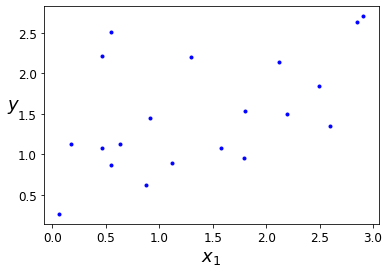

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X+ np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)

plot_generated_data(X,y)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X, y)
print('Ridge Predict value:', ridge_reg.predict([[1.5 ]]))

sgd_reg = SGDRegressor(penalty="l2",max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
print('SGD Predict value:', sgd_reg.predict([[1.5]]))

Ridge Predict value: [[1.55071465]]
SGD Predict value: [1.47012588]


In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    

Text(0, 0.5, '$y$')

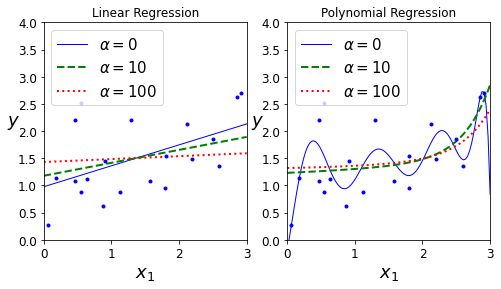

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(121)
#Linear regression with Ridge
plot_model(Ridge, polynomial=False, alphas= (0,10,100),random_state = 42)
plt.title('Linear Regression')
plt.ylabel("$y$",rotation=0,fontsize=18)

plt.subplot(122)
#Polynomial regression with Ridge
plot_model(Ridge, polynomial=True,alphas= (0,10,100),random_state = 42)
plt.title('Polynomial Regression')
plt.ylabel("$y$",rotation=0,fontsize=18)

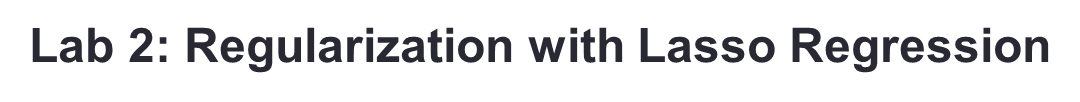

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
print('Lasso Predict value:',lasso_reg.predict([[1.5]]))

Lasso Predict value: [1.53788174]


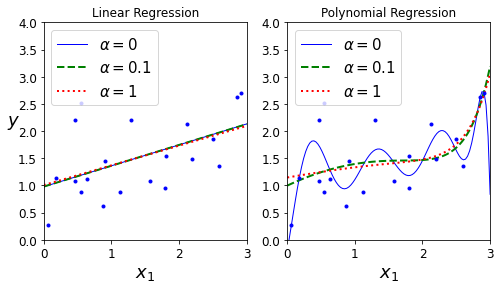

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(121)
#Linear regression with Ridge
plot_model(Ridge, polynomial=False, alphas= (0,0.1,1),random_state = 42)
plt.title('Linear Regression')
plt.ylabel("$y$",rotation=0,fontsize=18)

plt.subplot(122)
#Polynomial regression with Ridge
plot_model(Ridge, polynomial=True,alphas= (0,0.1,1),random_state = 42)
plt.title('Polynomial Regression')

plt.show()

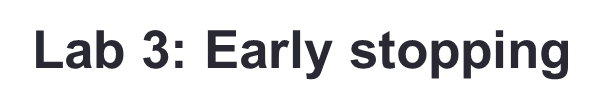

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
m=100
X = 6 * np.random.rand(m,1) - 3
y= 2+ X + 0.5 *X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),test_size=0.5,random_state=10)

X_train_poly_scaled, X_val_poly_scaled = early_stopping(X_train, X_val)

In [ ]:
from copy import deepcopy
sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty, warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)

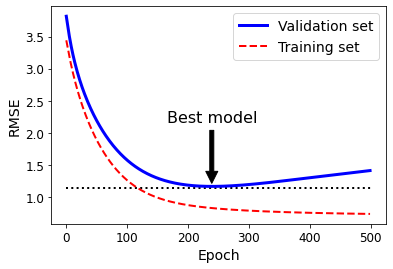

In [ ]:
plot_early_stopping()

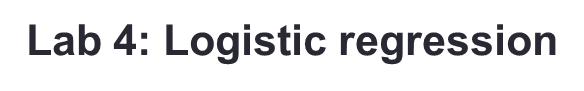

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

print('Dataset keys: ', iris.keys())

print('Data sample 0:', iris["data"][0])
#Target Values:
print('Target:', iris["target"][0]) #0

Dataset keys:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Data sample 0: [5.1 3.5 1.4 0.2]
Target: 0


In [ ]:
#prepare data
X = iris["data"][:,3:] #extract data contain only petal width
y = (iris["target"]==2).astype(np.int) #target =1 if Iris_virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Create new samples for the model to predict
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
# predict target of new samples
y_proba = log_reg.predict_proba(X_new)

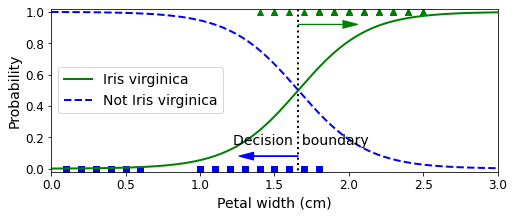

In [ ]:
plot_logistic(X_new,y_proba)

In [ ]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

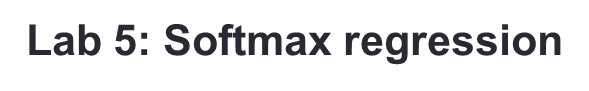

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
#preoare data
X= iris["data"][:, (2,3)] #petal length, petal width
y = iris["target"]

In [ ]:
# Train the model
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

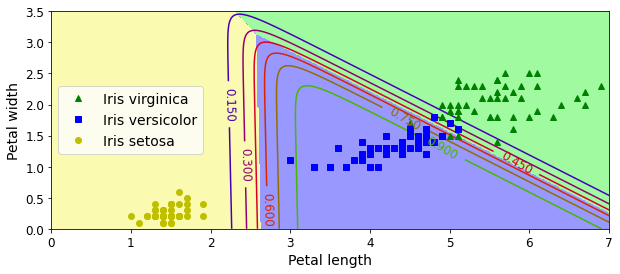

In [ ]:
plot_softmax()

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])